<br><br><center><h1 style="font-size:4em;color:#2467C0">Mini Project: Soccer Data Goal & Draw Analysis</h1></center>

In [1]:
#Import Libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create your connection.
myconnection = sqlite3.connect('database.sqlite')
Country = pd.read_sql_query("SELECT * FROM Country", myconnection)
League = pd.read_sql_query("SELECT * FROM League", myconnection)
Match = pd.read_sql_query("SELECT * FROM Match", myconnection)
Player = pd.read_sql_query("SELECT * FROM Player", myconnection)
Player_Attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", myconnection)
Team = pd.read_sql_query("SELECT * FROM Team", myconnection)
Team_Attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", myconnection)

In [3]:
#Exploring Data
Country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [4]:
#Exploring Data
League.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [5]:
#Exploring Data
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [6]:
#Exploring Data
Team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [7]:
# Generating a Sub-set Dataframe with required attribute
Match = Match[['country_id','league_id','season','stage','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','card']]

In [8]:
Match.head()

,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,card
0,1,1,2008/2009,1,492473,9987,9993,1,1,None
1,1,1,2008/2009,1,492474,10000,9994,0,0,None
2,1,1,2008/2009,1,492475,9984,8635,0,3,None
3,1,1,2008/2009,1,492476,9991,9998,5,0,None
4,1,1,2008/2009,1,492477,7947,9985,1,3,None


In [9]:
# Adding Total Goals Scores attribute
Match['Total_Goal'] = Match['home_team_goal'] + Match['away_team_goal']
Match.head()

,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,card,Total_Goal
0,1,1,2008/2009,1,492473,9987,9993,1,1,None,2
1,1,1,2008/2009,1,492474,10000,9994,0,0,None,0
2,1,1,2008/2009,1,492475,9984,8635,0,3,None,3
3,1,1,2008/2009,1,492476,9991,9998,5,0,None,5
4,1,1,2008/2009,1,492477,7947,9985,1,3,None,4


In [33]:
Match.isnull().sum()

country_id              0
league_id               0
season                  0
stage                   0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
card                11762
Total_Goal              0
dtype: int64

In [10]:
# Exploring Data
# Looking at some interesting stat
Match.describe().T

,count,mean,std,min,25%,50%,75%,max
country_id,25979.0,1.173863e+04,7553.936759,1.0,4769.0,10257.0,17642.0,24558.0
league_id,25979.0,1.173863e+04,7553.936759,1.0,4769.0,10257.0,17642.0,24558.0
stage,25979.0,1.824277e+01,10.407354,1.0,9.0,18.0,27.0,38.0
match_api_id,25979.0,1.195429e+06,494627.856527,483129.0,768436.5,1147511.0,1709852.5,2216672.0
home_team_api_id,25979.0,9.984372e+03,14087.453758,1601.0,8475.0,8697.0,9925.0,274581.0
away_team_api_id,25979.0,9.984475e+03,14087.445135,1601.0,8475.0,8697.0,9925.0,274581.0
home_team_goal,25979.0,1.544594e+00,1.297158,0.0,1.0,1.0,2.0,10.0
away_team_goal,25979.0,1.160938e+00,1.142110,0.0,0.0,1.0,2.0,9.0
Total_Goal,25979.0,2.705531e+00,1.672456,0.0,2.0,3.0,4.0,12.0


In [11]:
Goal_analysis = Match.groupby('country_id').sum()[['home_team_goal','away_team_goal','Total_Goal']].reset_index()

In [12]:
Goal_analysis_by_league = Goal_analysis.merge(League,how='inner',on='country_id')

In [13]:
Goal_analysis_by_league_final = Goal_analysis_by_league.sort_values('Total_Goal').ix[:,['name','Total_Goal']].reset_index()

C:\Users\501282249\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [14]:
del Goal_analysis_by_league_final['index']

In [15]:
Goal_analysis_by_league_final = Goal_analysis_by_league_final.sort_values('Total_Goal',ascending=False)

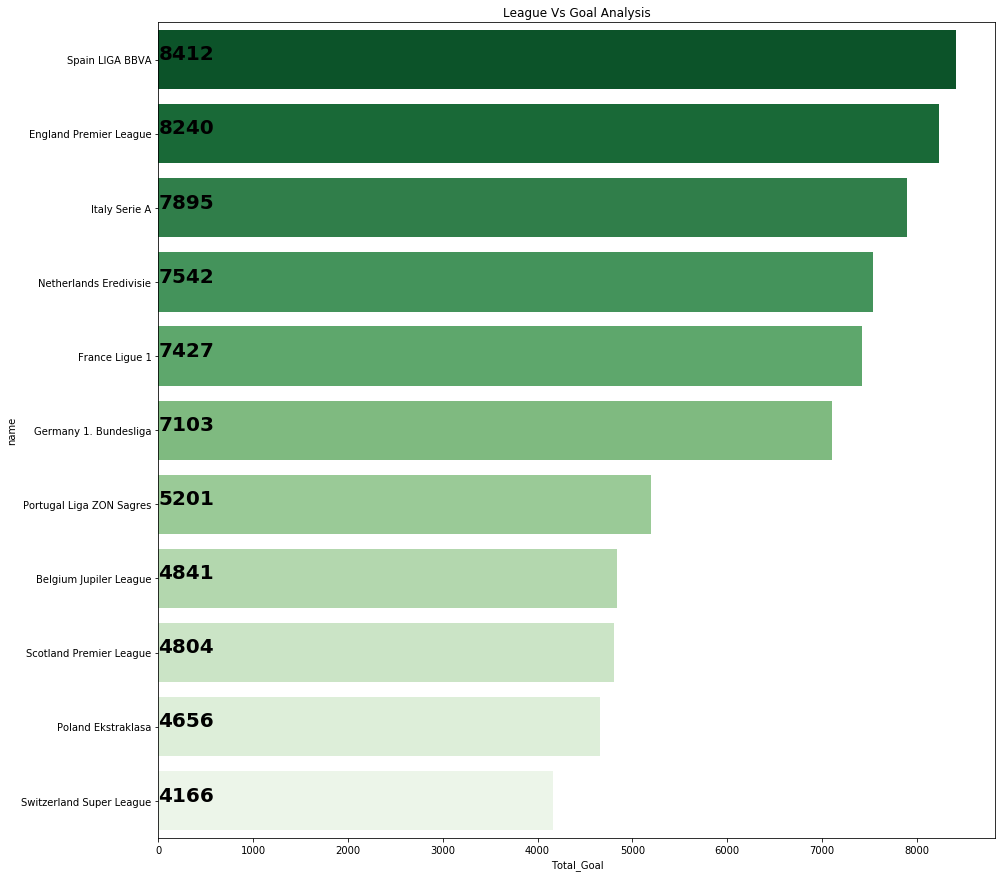

In [16]:
plt.figure(figsize=(15,15))
plt.title("League Vs Goal Analysis")
sns.barplot(y="name",x="Total_Goal",data=Goal_analysis_by_league_final,palette="Greens_r")
for i,j in enumerate(Goal_analysis_by_league_final["Total_Goal"]):
    plt.text(.7,i,j,weight = "bold",fontsize=20)

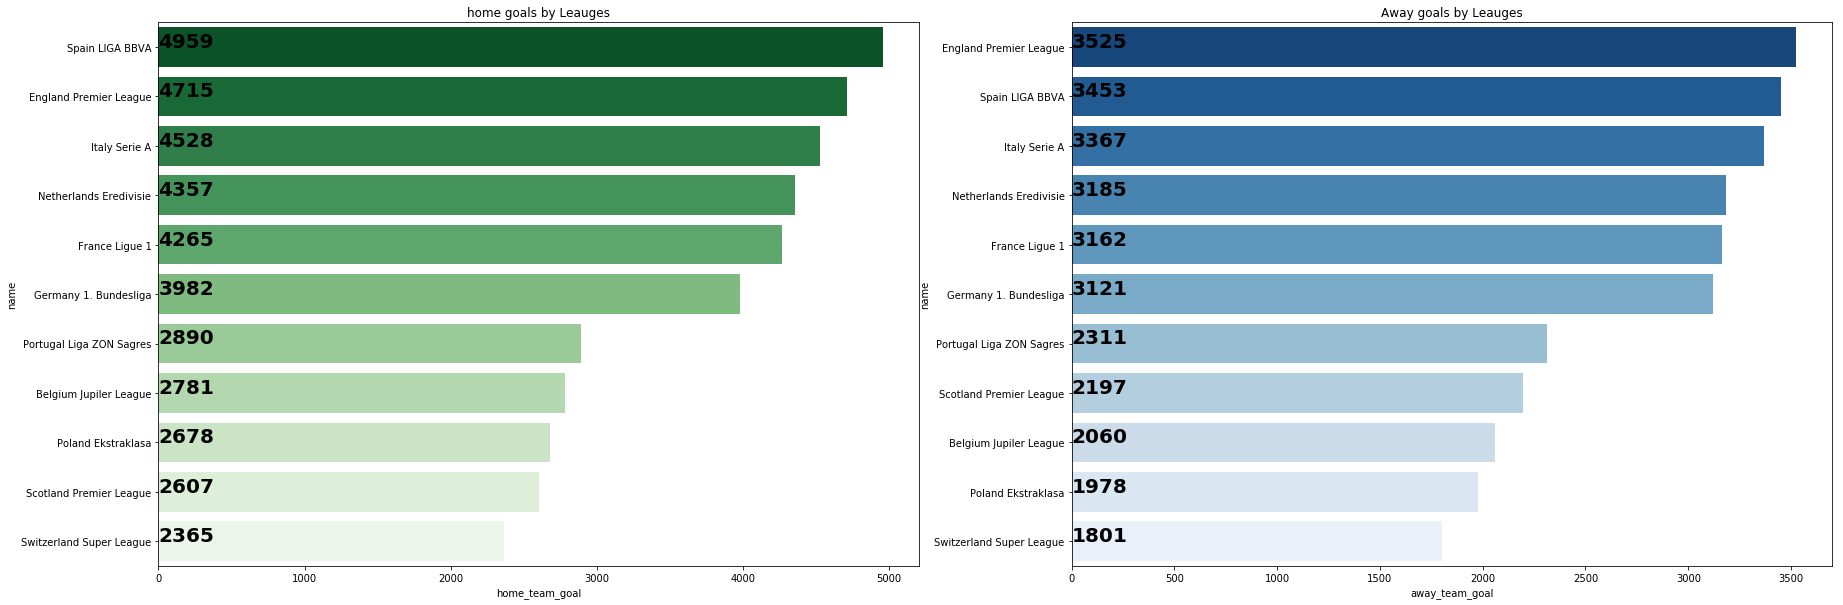

In [17]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plt.title("home goals by Leauges")
Goal_analysis_by_league_home = Goal_analysis_by_league.sort_values('home_team_goal',ascending=False)
sns.barplot(y="name",x="home_team_goal",data=Goal_analysis_by_league_home,palette="Greens_r")
for i,j in enumerate(Goal_analysis_by_league_home["home_team_goal"]):
    plt.text(.7,i,j,weight = "bold",fontsize=20)   
    
    
    
plt.subplot(122)
plt.title("Away goals by Leauges")
Goal_analysis_by_league_away = Goal_analysis_by_league.sort_values('away_team_goal',ascending=False)
sns.barplot(y="name",x="away_team_goal",data=Goal_analysis_by_league_away,palette="Blues_r")
for i,j in enumerate(Goal_analysis_by_league_away["away_team_goal"]):
    plt.text(.7,i,j,weight = "bold",fontsize=20)    

In [18]:
Goal_analysis_by_league

,country_id,home_team_goal,away_team_goal,Total_Goal,id,name
0,1,2781,2060,4841,1,Belgium Jupiler League
1,1729,4715,3525,8240,1729,England Premier League
2,4769,4265,3162,7427,4769,France Ligue 1
3,7809,3982,3121,7103,7809,Germany 1. Bundesliga
4,10257,4528,3367,7895,10257,Italy Serie A
5,13274,4357,3185,7542,13274,Netherlands Eredivisie
6,15722,2678,1978,4656,15722,Poland Ekstraklasa
7,17642,2890,2311,5201,17642,Portugal Liga ZON Sagres
8,19694,2607,2197,4804,19694,Scotland Premier League
9,21518,4959,3453,8412,21518,Spain LIGA BBVA


In [19]:
Goal_analysis_by_season = Match.groupby(['season']).sum()[['Total_Goal']].reset_index()

In [20]:
Goal_analysis_by_season

,season,Total_Goal
0,2008/2009,8672
1,2009/2010,8632
2,2010/2011,8749
3,2011/2012,8747
4,2012/2013,9039
5,2013/2014,8389
6,2014/2015,8897
7,2015/2016,9162


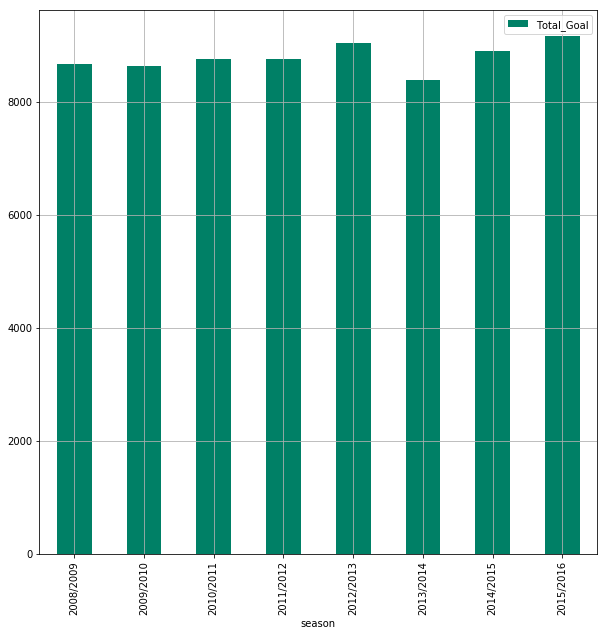

In [21]:
Goal_analysis_by_season.plot(kind='bar',x='season',figsize=(10,10),colormap='summer',use_index=True,grid=True,)

In [22]:
Home_team_Details =  Match.merge(Team,how='inner',left_on='home_team_api_id',right_on='team_api_id')

In [23]:
Away_team_Details = Match.merge(Team,how='inner',left_on='away_team_api_id',right_on='team_api_id')

In [24]:
Home_team_Details = Home_team_Details[['season','match_api_id','team_long_name','home_team_goal']]
Away_team_Details = Away_team_Details[['season','match_api_id','team_long_name','away_team_goal']]

In [25]:
Home_team_Details.head()

,season,match_api_id,team_long_name,home_team_goal
0,2008/2009,492473,KRC Genk,1
1,2008/2009,492583,KRC Genk,1
2,2008/2009,492651,KRC Genk,3
3,2008/2009,492713,KRC Genk,1
4,2008/2009,492805,KRC Genk,2


In [26]:
Away_team_Details.head()

,season,match_api_id,team_long_name,away_team_goal
0,2008/2009,492473,Beerschot AC,1
1,2008/2009,492584,Beerschot AC,2
2,2008/2009,492649,Beerschot AC,0
3,2008/2009,492724,Beerschot AC,1
4,2008/2009,492819,Beerschot AC,1


In [27]:
Goal_analysis_by_teams = Home_team_Details.merge(Away_team_Details,how='inner',on='match_api_id')

In [28]:
Goal_analysis_by_teams.head()

,season_x,match_api_id,team_long_name_x,home_team_goal,season_y,team_long_name_y,away_team_goal
0,2008/2009,492473,KRC Genk,1,2008/2009,Beerschot AC,1
1,2008/2009,492583,KRC Genk,1,2008/2009,KSV Roeselare,1
2,2008/2009,492651,KRC Genk,3,2008/2009,KSV Cercle Brugge,2
3,2008/2009,492713,KRC Genk,1,2008/2009,Sporting Charleroi,0
4,2008/2009,492805,KRC Genk,2,2008/2009,RAEC Mons,0


In [29]:
#Renamening columns
Goal_analysis_by_teams.rename(columns={'team_long_name_x': 'Home_team_name', 'team_long_name_y': 'Away_team_name'}, inplace=True)

In [30]:
# Selecting Top 10 team Having Most number of Home Goal
Goal_analysis_by_teams_home  = Goal_analysis_by_teams.groupby('Home_team_name').sum()[['home_team_goal']].\
                                                sort_values('home_team_goal',ascending=False).reset_index() \
                                                .head(10)
# Selecting Top 10 team Having Most number of Away Goal 
Goal_analysis_by_teams_away = Goal_analysis_by_teams.groupby('Away_team_name').sum()[['away_team_goal']] \
                                                 .sort_values('away_team_goal',ascending=False).reset_index() \
                                                 .head(10)

In [31]:
print(Goal_analysis_by_teams_away)
print (Goal_analysis_by_teams_home)

      Away_team_name  away_team_goal
0       FC Barcelona             354
1     Real Madrid CF             338
2             Celtic             306
3               Ajax             287
4                PSV             282
5           FC Basel             275
6   FC Bayern Munich             271
7            Arsenal             267
8  Borussia Dortmund             253
9            Chelsea             250
      Home_team_name  home_team_goal
0     Real Madrid CF             505
1       FC Barcelona             495
2             Celtic             389
3   FC Bayern Munich             382
4                PSV             370
5    Manchester City             365
6               Ajax             360
7           FC Basel             344
8  Manchester United             338
9            Chelsea             333


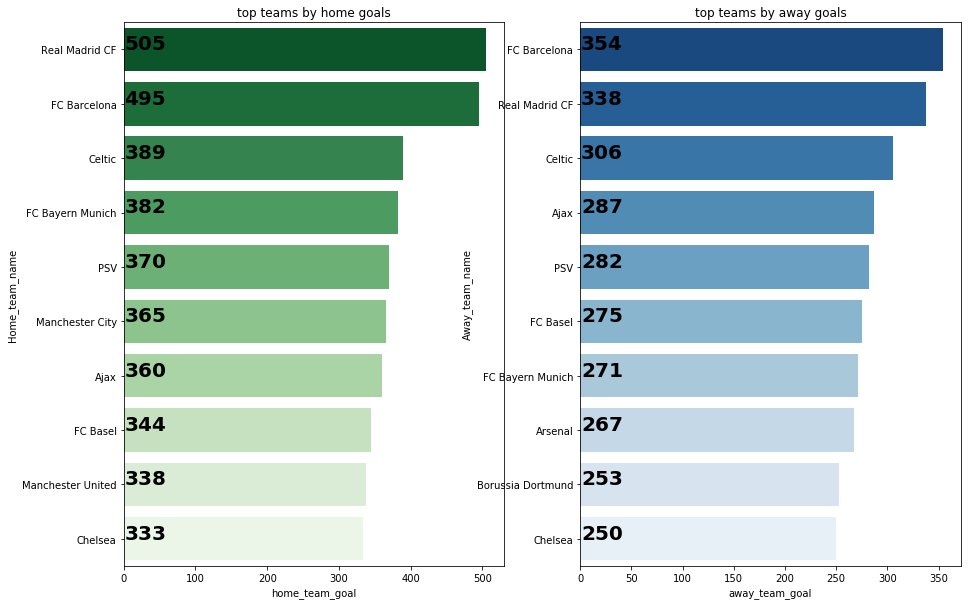

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("top teams by home goals")
sns.barplot(y="Home_team_name",x="home_team_goal",data=Goal_analysis_by_teams_home,palette="Greens_r")
for i,j in enumerate(Goal_analysis_by_teams_home["home_team_goal"]):
    plt.text(.7,i,j,weight = "bold",fontsize=20)
plt.subplot(122)
plt.title("top teams by away goals")
sns.barplot(y="Away_team_name",x="away_team_goal",data=Goal_analysis_by_teams_away,palette="Blues_r")
for i,j in enumerate(Goal_analysis_by_teams_away["away_team_goal"]):
    plt.text(.7,i,j,weight = "bold",fontsize=20)

In [67]:
Goal_less_draws = Match[(Match.home_team_goal==0) & (Match.away_team_goal==0)]

In [68]:
Goal_less_draws_by_leage  = Goal_less_draws.merge(League,on='country_id',how='inner')

In [69]:
Goal_less_draws_by_leage.shape

(1978, 13)

In [70]:
Goal_less_draws_by_leage = Goal_less_draws_by_leage.groupby('name').count()[['id']].sort_values('id',ascending=False).reset_index()

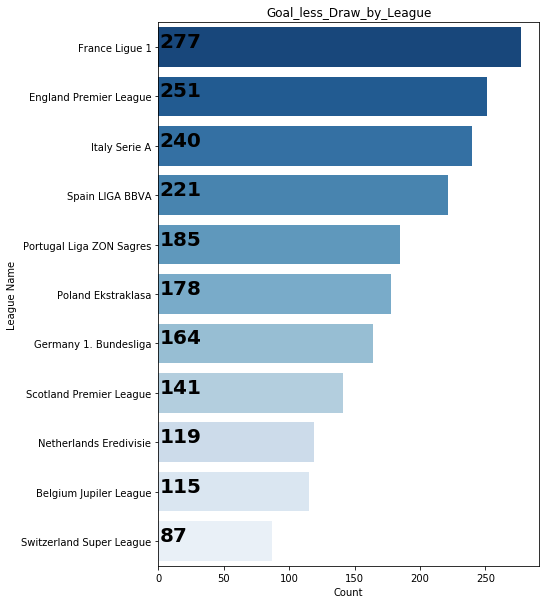

In [80]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Goal_less_Draw_by_League")
ax = sns.barplot(y="name",x="id",data=Goal_less_draws_by_leage,palette="Blues_r",)
ax.set(xlabel='Count', ylabel='League Name')
for i,j in enumerate(Goal_less_draws_by_leage["id"]):
    plt.text(.7,i,j,weight = "bold",fontsize=20)